##Telco Churn Analysis - EDA


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  
%matplotlib inline
import seaborn as sns


In [10]:
telco_df = pd.read_csv("data\WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [11]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
telco_df.shape

(7043, 21)

In [13]:
#get all the columns(features) of the table
telco_df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [14]:
#checking the datatype of the all colums
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in telco_df.columns if telco_df[feature].dtype != 'O']
categorical_features = [feature for feature in telco_df.columns if telco_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [16]:
# Check the descriptive statistics of numeric variables
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Insight
- SeniorCitizen: The SeniorCitizen feature is categorical, with values of 0 (no) and 1 (yes). Since it shows 0 for the 25th, 50th, and 75th percentiles, it indicates that the majority of customers are not senior citizens.
- Tenure: 75% of customers have a tenure of less than 55 months, suggesting that a significant portion of the customer base is relatively new or has not been with the company for an extended period.
- Monthly Charges: The average monthly charge is $64.76. Notably, 25% of customers pay more than $89.85 per month, indicating that a subset of the customer base incurs higher charges.


Text(0.5, 1.02, 'Count of TARGET Variable per category')

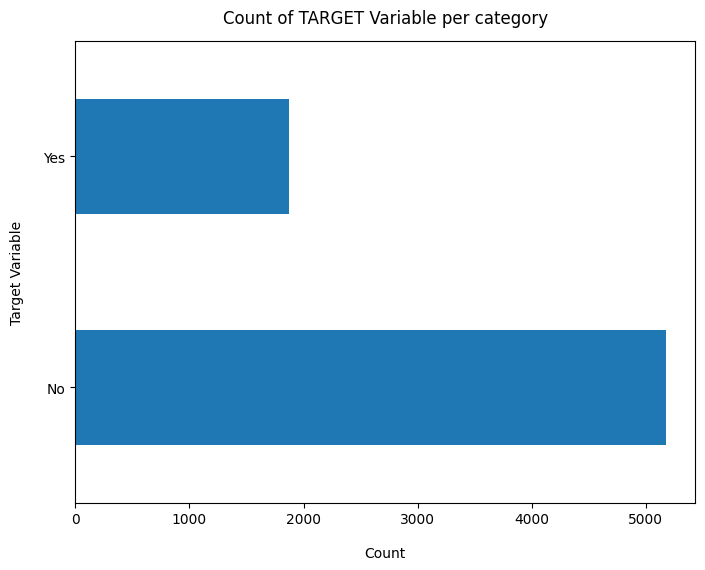

In [17]:
telco_df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [18]:
100*telco_df['Churn'].value_counts()/len(telco_df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

#### Insight
- Class Imbalance: There is a significant class imbalance in the dataset.
-  Out of the total customers, around 73% have not churned (No), while only around 26% have churned (Yes).
-  This indicates that the majority of the customers have stayed with the service, with a smaller proportion leaving.

**Implications**:
- Potential Bias in Modeling: This class imbalance can lead to bias in machine learning models, where the model may become more accurate in predicting the majority class (No) while underperforming on the minority class (Yes).

- Need for Resampling Techniques: To address this imbalance, techniques such as oversampling the minority class (Yes), undersampling the majority class (No), or using specialized algorithms like SMOTE (Synthetic Minority Over-sampling Technique) may be required.

- Focus on Minority Class: Since the business goal is to reduce churn, special attention should be given to improving the model's ability to accurately predict the minority class (Yes).

In [19]:
# Display a detailed summary of the DataFrame
telco_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


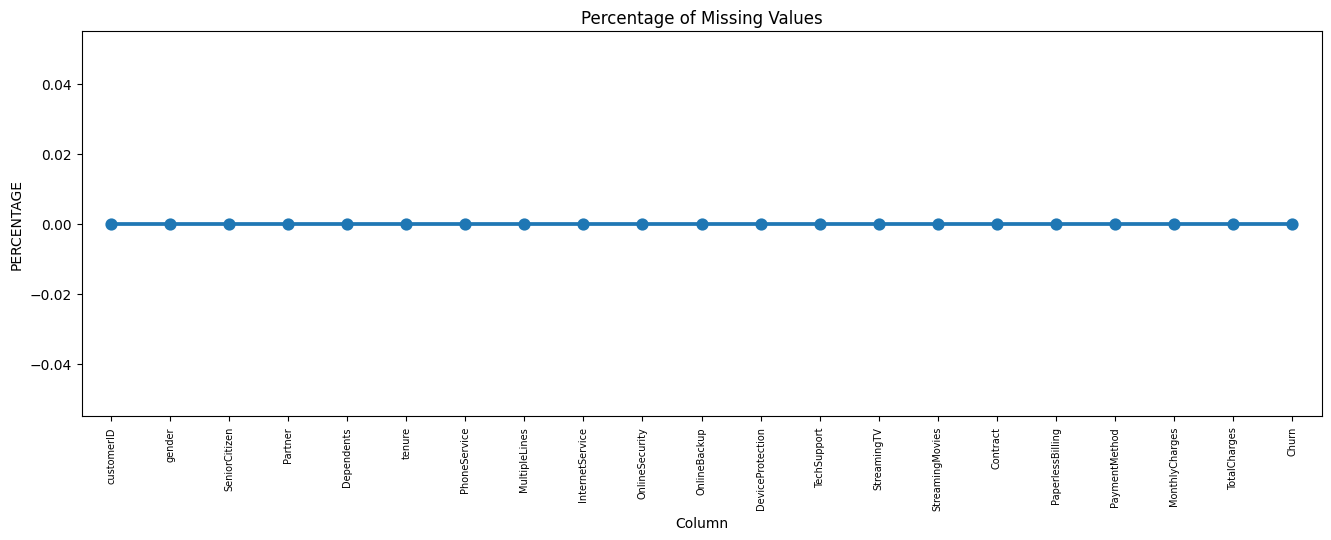

In [20]:
# Visualize the percentage of missing values in each column of the DataFrame using a point plot.
missing_val = pd.DataFrame((telco_df.isnull().sum()) * 100 / telco_df.shape[0]).reset_index()
missing_val.columns = ['Column', 'MissingPercentage']
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='MissingPercentage', data=missing_val)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()



####insight
- here we don't have any missing values

## Data Cleaning

In [21]:
#create a copy of data
telco_df_new = telco_df.copy()

In [22]:
# Convert the 'TotalCharges' column to numeric, setting non-convertible values to NaN.
telco_df_new.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')

# Count the number of missing values in each column after the conversion.
telco_df_new.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### insight
- 11 missing values for 'TotalCharges' column


In [23]:
# Select and display rows where the 'TotalCharges' column has missing values (NaN).
telco_df_new.loc[telco_df_new['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [24]:
# Removing Missing values (since the % of this null is very low compared to total dataset)
telco_df_new.dropna(how='any', inplace=True)

In [25]:
telco_df_new.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
# Retrieve the maximum value from the 'tenure' column in the DataFrame.
telco_df_new['tenure'].max()


72

In [27]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_df_new['tenure_group'] = pd.cut(telco_df_new.tenure, range(1, 80, 12), right=False, labels=labels)

In [28]:
telco_df_new['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [29]:
# drop column customerID and tenure (not required for further processing)

telco_df_new.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
telco_df_new.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

### Univariate Analysis

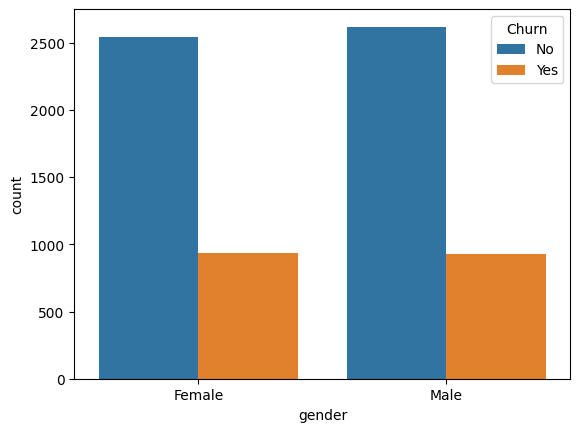

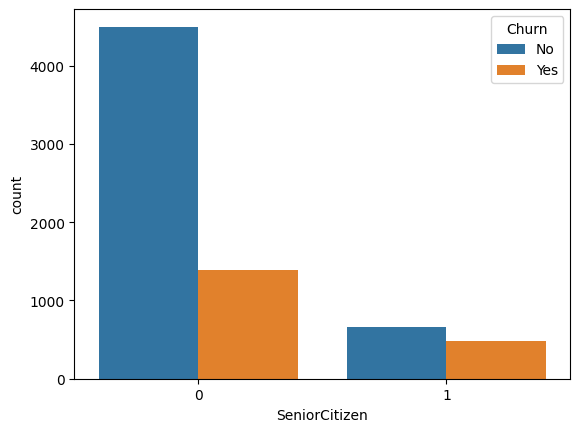

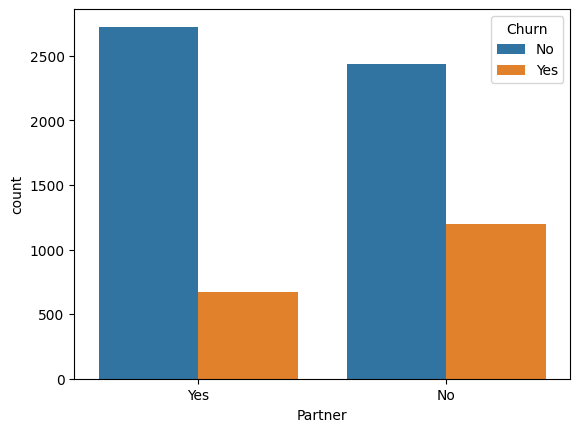

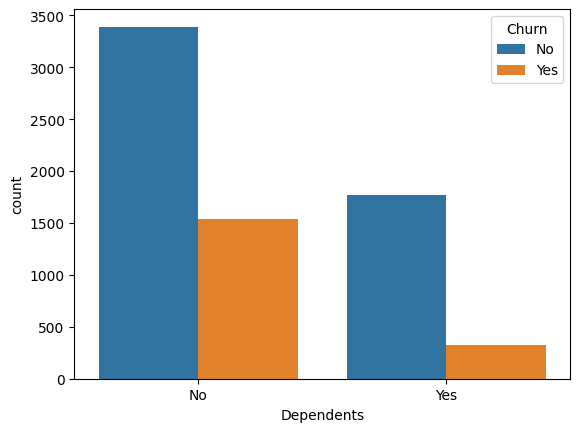

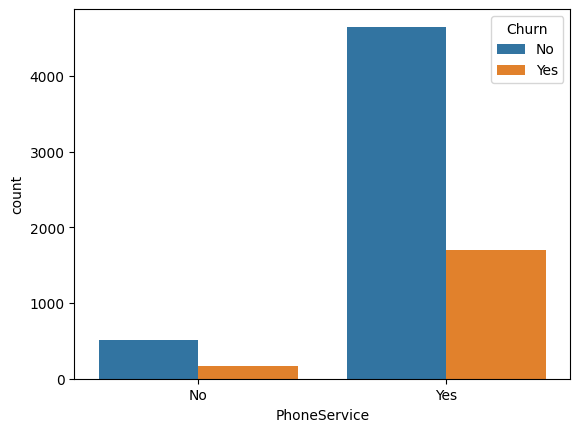

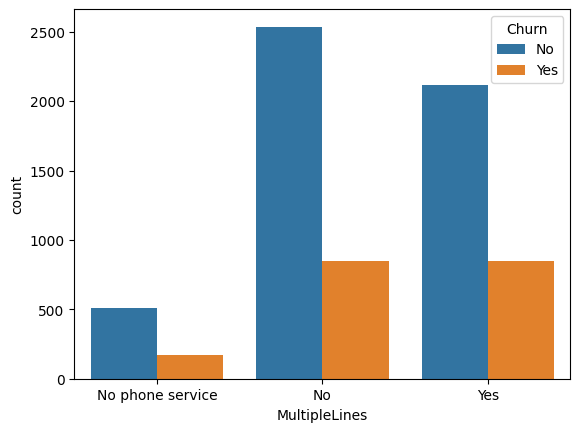

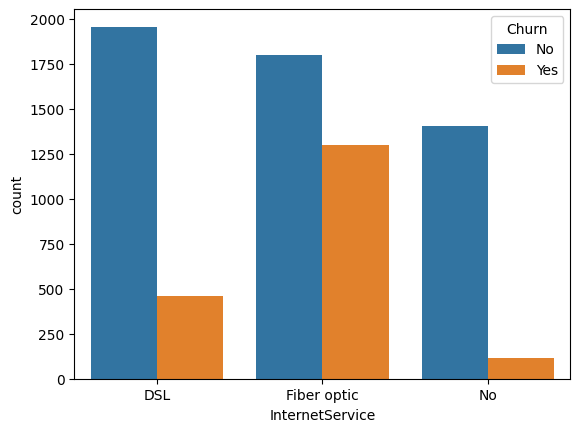

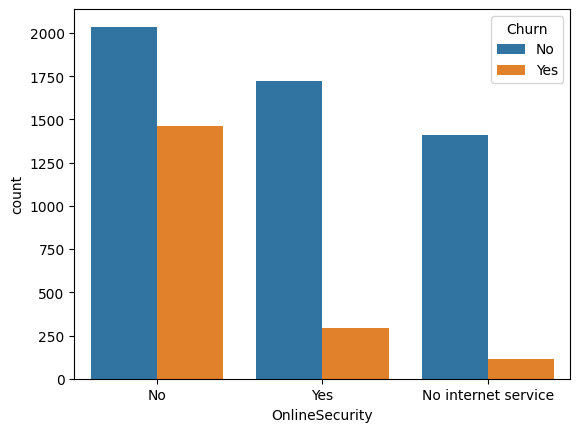

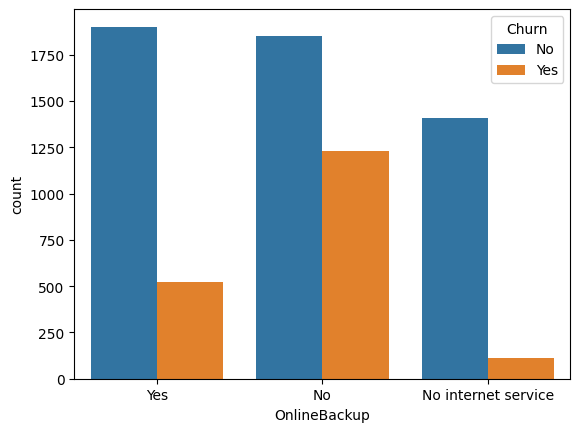

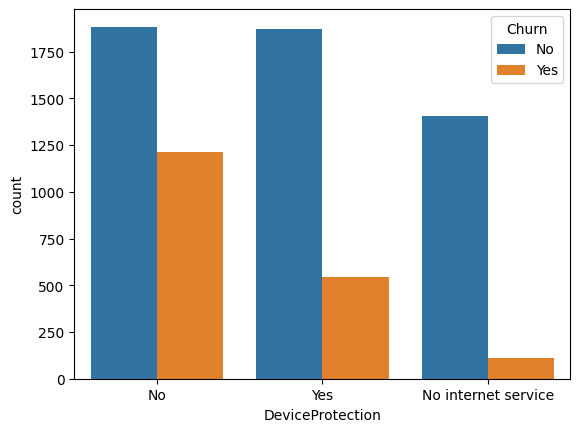

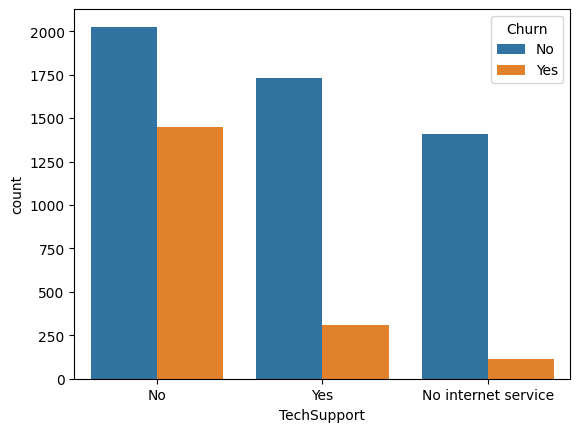

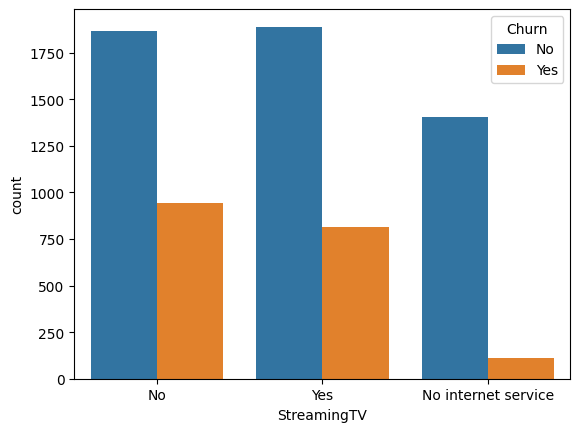

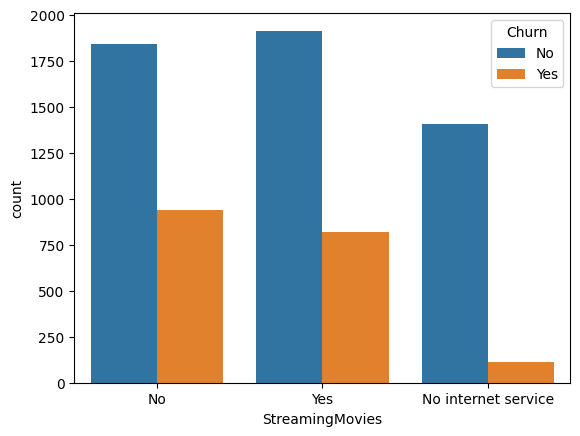

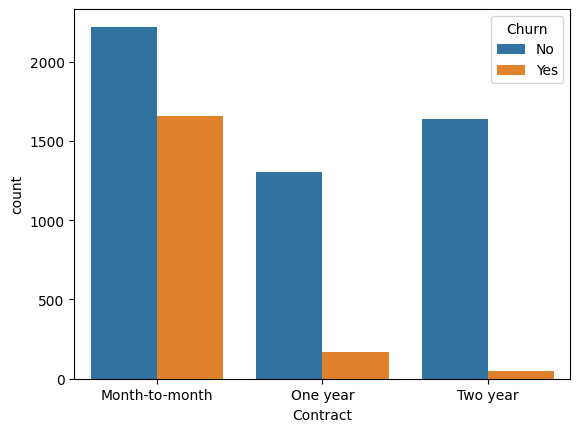

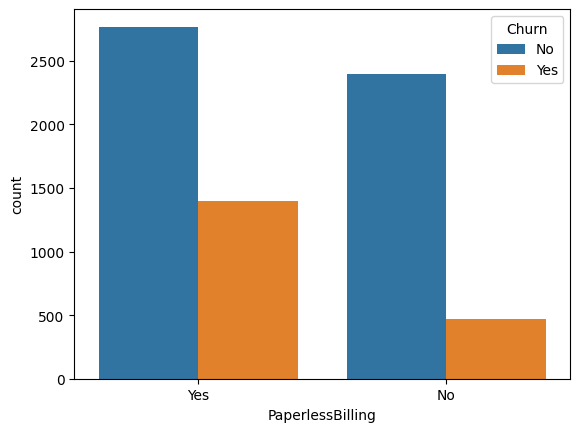

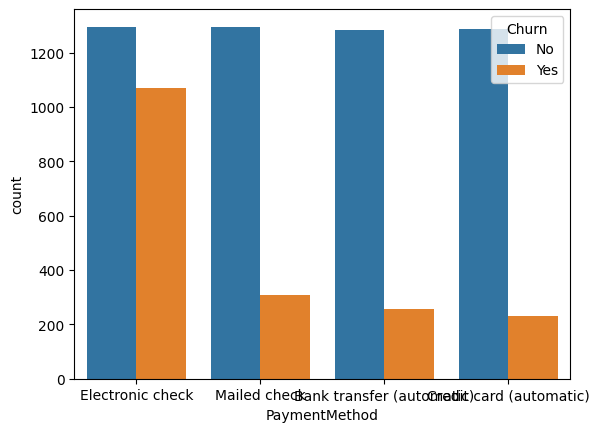

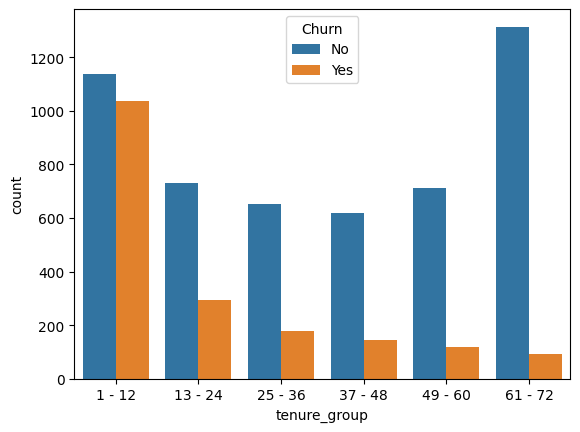

In [30]:
# Create count plots for each predictor variable (excluding 'Churn', 'TotalCharges', and 'MonthlyCharges'),
# displaying the distribution of each predictor variable with respect to the 'Churn' target variable.
for i, predictor in enumerate(telco_df_new.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_df_new, x=predictor, hue='Churn')


#### insights 
**1** The chart shows that customer churn rates are similar across genders, with no significant difference between males and females. Gender does not appear to be a major factor in predicting churn.

**2** senior citizens are more likely to churn than non-senior citizens.
**3** customers without a partner are more likely to churn than those with a partner
**4** customers without dependents are more likely to churn compared to those with dependents, although the total number of customers without dependents is larger
**5** customers with phone service are more numerous and exhibit a higher churn rate compared to those without phone service, who are fewer in number and have lower churn.
**6** customers with no multiple lines (middle group) are less likely to churn compared to those with multiple lines, while those without phone service show the least churn, likely due to their smaller population
**7** customers with Fiber Optic internet are more likely to churn compared to those with DSL or no internet service, where the churn rate is considerably lower
**8** customers without online security are more likely to churn, while those with online security are more likely to stay. Customers without internet service exhibit the lowest churn rates
**9**  customers without online backup are more likely to churn, while those with online backup have a lower churn rate. Customers without internet service have the lowest churn rates overall.
**10** customers without device protection are more likely to churn, while those with device protection show a lower churn rate. Customers without internet service exhibit the lowest churn rates overall.
**11** Customers without tech support are more likely to churn, while those with tech support have a lower churn rate. Customers without internet service continue to show the lowest churn rates overall.
**12** customers without Streaming TV are more likely to churn, while those with Streaming TV show a lower churn rate. Customers without internet service consistently exhibit the lowest churn rates overall.
**13** customers without Streaming Movies are more likely to churn, while those with Streaming Movies have a lower churn rate. Customers without internet service consistently show the lowest churn rates.
**14**  customers with month-to-month contracts are more likely to churn, while those with longer contracts (one or two years) are less likely to churn, with two-year contract customers being the most stable.
**15** customers who use paperless billing are more likely to churn than those who do not.
**16** customers who use electronic checks are more likely to churn, while those who use mailed checks, bank transfers, or credit cards show a much lower likelihood of churning.
**17** customers who have been with the service for a shorter period are more likely to churn, while those with a longer tenure are more likely to remain loyal and stay with the service.


#### implications
**['Churn', 'TotalCharges', 'MonthlyCharges'] are dropped for the following reasons:**
'Churn': This is the target variable you want to predict, not a predictor variable. Including it in the plots would confuse the analysis because it doesn’t serve as a feature for prediction.

'TotalCharges' and 'MonthlyCharges': These columns might be numeric and have continuous values. Count plots are more suitable for categorical data. If these columns are not categorical or if their distributions are too detailed for count plots, they might not provide meaningful visualizations in this context.

In [31]:
# Convert the 'Churn' column, which is the target variable, from categorical (Yes/No) to numerical (1/0).
telco_df_new['Churn'] = np.where(telco_df_new.Churn == 'Yes', 1, 0)


In [32]:
telco_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [33]:
# Create dummy variables for all categorical features in the DataFrame
telco_df_new_dummies = pd.get_dummies(telco_df_new, drop_first=True)
telco_df_new_dummies = telco_df_new_dummies.astype(int)


In [34]:
telco_df_new_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56,1889,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53,108,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42,1840,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70,151,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


**Relationship between Monthly Charges and Total Charges**

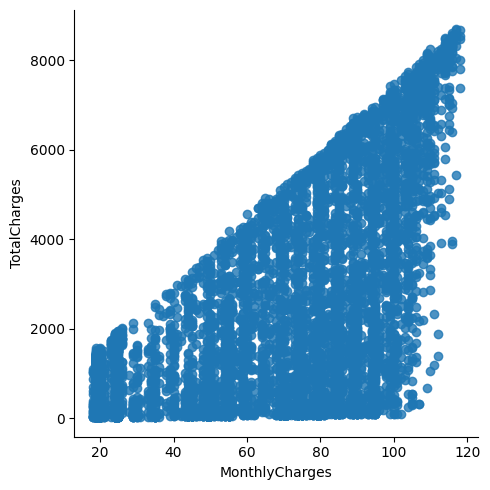

In [35]:
# Create a scatter plot without regression line
sns.lmplot(data=telco_df_new_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

#### insight
 - It shows a strong positive correlation between MonthlyCharges and TotalCharges, indicating that as customers' monthly charges increase, their total charges also increase.
 - The plot suggests that higher total charges are likely due to longer customer tenures combined with higher monthly rates.

**Churn by Monthly Charges and Total Charges**

C:\Users\ssfat\AppData\Local\Temp\ipykernel_18336\3703290024.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ChurnByMonth = sns.kdeplot(telco_df_new_dummies.MonthlyCharges[(telco_df_new_dummies["Churn"]== 0)], color='Red' , shade = True)
C:\Users\ssfat\AppData\Local\Temp\ipykernel_18336\3703290024.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ChurnByMonth = sns.kdeplot(telco_df_new_dummies.MonthlyCharges[(telco_df_new_dummies["Churn"]== 1)],ax=ChurnByMonth, color='Green' , shade = True)


Text(0.5, 1.0, 'Monthly charges by churn')

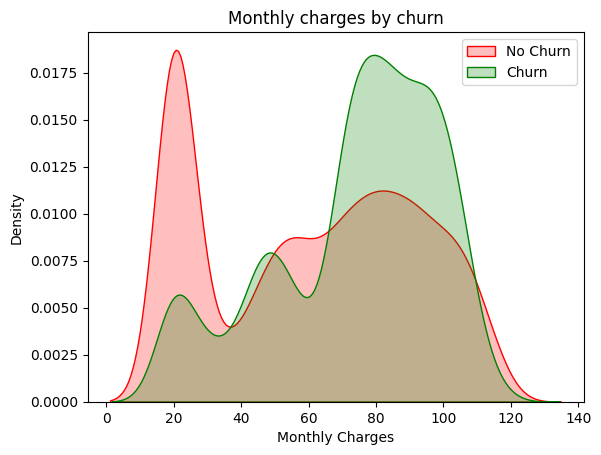

In [36]:
# KDE plot for customers who did not churn
ChurnByMonth = sns.kdeplot(telco_df_new_dummies.MonthlyCharges[(telco_df_new_dummies["Churn"]== 0)], color='Red' , shade = True)

# KDE plot for customers who churn
ChurnByMonth = sns.kdeplot(telco_df_new_dummies.MonthlyCharges[(telco_df_new_dummies["Churn"]== 1)],ax=ChurnByMonth, color='Green' , shade = True)

# Adding legend, labels, and title
ChurnByMonth.legend(["No Churn","Churn"],loc='upper right')
ChurnByMonth.set_ylabel('Density')
ChurnByMonth.set_xlabel('Monthly Charges')
ChurnByMonth.set_title('Monthly charges by churn')


#### insight

Customers with lower monthly charges are less likely to churn, while those with moderate to high monthly charges are more likely to churn.

C:\Users\ssfat\AppData\Local\Temp\ipykernel_18336\936705003.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ChurnByTotal =sns.kdeplot(telco_df_new_dummies.TotalCharges[(telco_df_new_dummies["Churn"]==0)], color="Red", shade =True)
C:\Users\ssfat\AppData\Local\Temp\ipykernel_18336\936705003.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ChurnByTotal =sns.kdeplot(telco_df_new_dummies.TotalCharges[(telco_df_new_dummies["Churn"]==1)], ax= ChurnByTotal,color="Green", shade =True)


Text(0.5, 1.0, 'Total charges by churn')

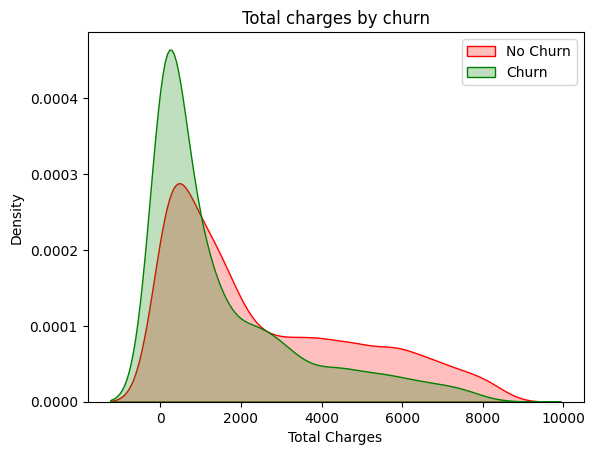

In [37]:
ChurnByTotal =sns.kdeplot(telco_df_new_dummies.TotalCharges[(telco_df_new_dummies["Churn"]==0)], color="Red", shade =True)
ChurnByTotal =sns.kdeplot(telco_df_new_dummies.TotalCharges[(telco_df_new_dummies["Churn"]==1)], ax= ChurnByTotal,color="Green", shade =True)
ChurnByTotal.legend(["No Churn","Churn"],loc='upper right')
ChurnByTotal.set_ylabel('Density')
ChurnByTotal.set_xlabel('Total Charges')
ChurnByTotal.set_title('Total charges by churn')

                          


#### insight 
- Customers with lower total charges are more likely to churn, indicating that they may have had shorter tenures or less engagement with the service.
- In contrast, those with higher total charges tend to stay longer with the service, resulting in lower churn rates.

**Surprising Insight**: 
- There's a higher churn rate among customers with lower total charges, which initially seems unexpected.

- Clarified Understanding: When we consider the combined effects of tenure, monthly charges, and total charges, the situation becomes clearer:

- Higher Monthly Charges: Customers who pay more each month.
- Lower Tenure: These customers are relatively new and have only been with the service for a short time.
- Lower Total Charges: Because of their short tenure, their - - cumulative total charges remain low, even with higher monthly payments.
**Conclusion:The combination of high monthly charges, short tenure, and low total charges is strongly linked to high churn rates.** This suggests that new customers who face high monthly fees are more likely to leave early, possibly due to dissatisfaction or the perceived lack of value for money. Understanding this can help in developing strategies to retain these high-risk customers.

<Axes: >

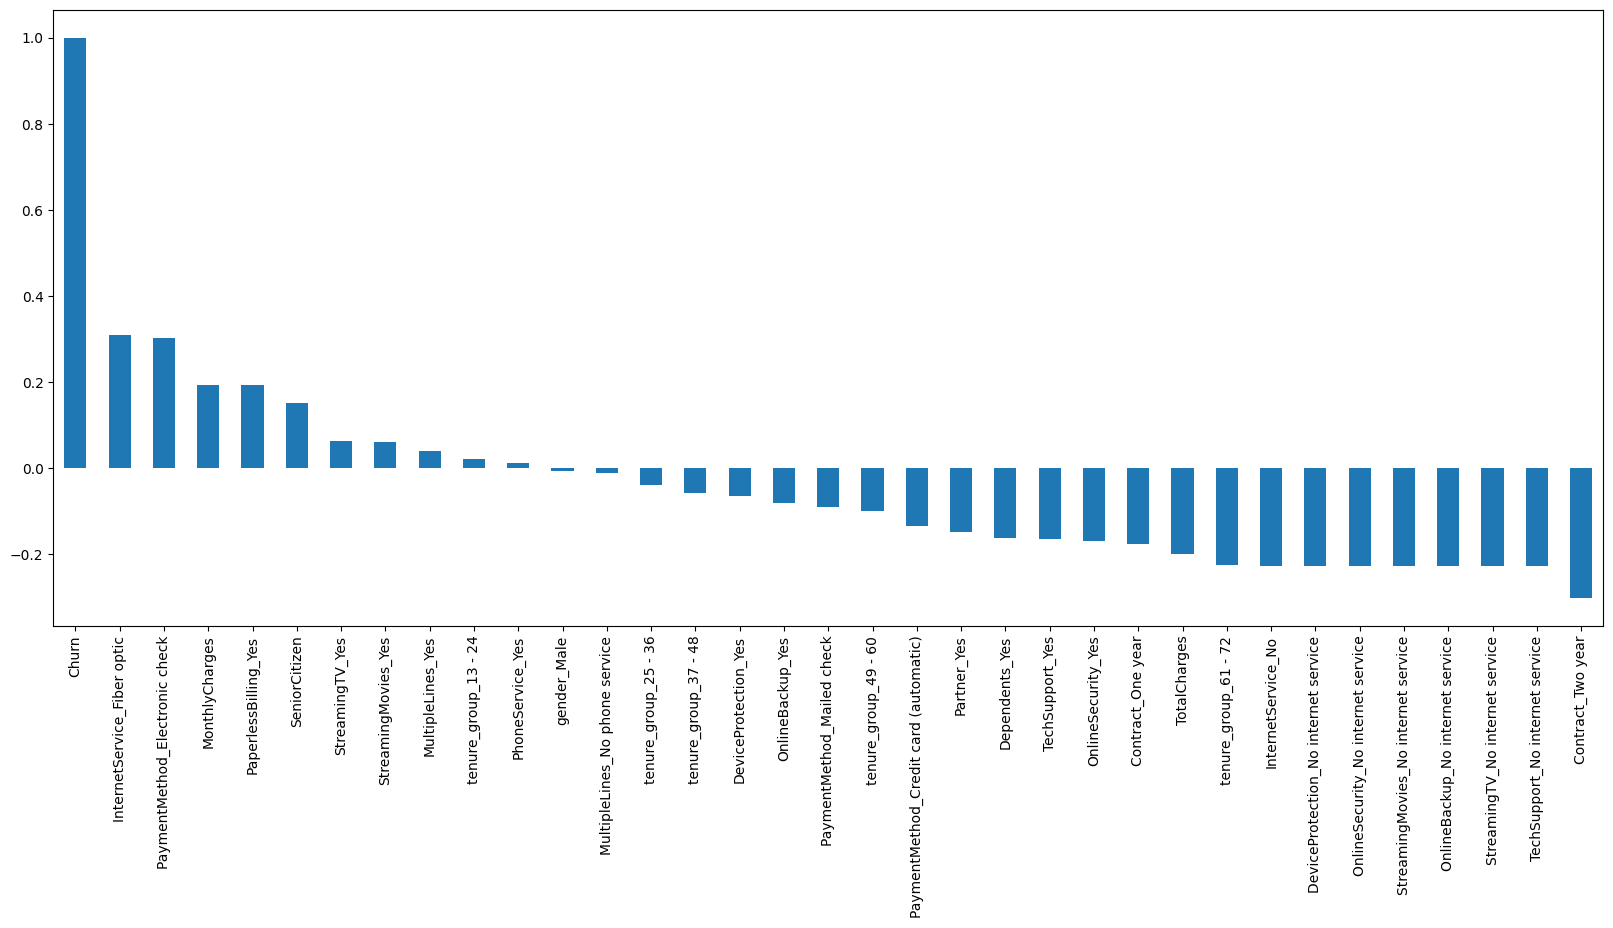

In [38]:

plt.figure(figsize=(20,8))


# Calculate the correlation of each feature with the 'Churn' variable
# and sort the values in descending order
telco_df_new_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')





# Derived Insights

- **High Churn** is observed in cases of:
  - **Month-to-month contracts**
  - **No online security**
  - **No tech support**
  - **First year of subscription**
  - **Fibre Optics Internet**

- **Low Churn** is observed in cases of:
  - **Long-term contracts**
  - **Subscriptions without internet service**
  - **Customers engaged for 5+ years**

- Factors such as **Gender**, **Availability of Phone Service**, and **Number of Multiple Lines** have **minimal to no impact** on churn.

## These observations are also supported by the **heatmap** below.


<Axes: >

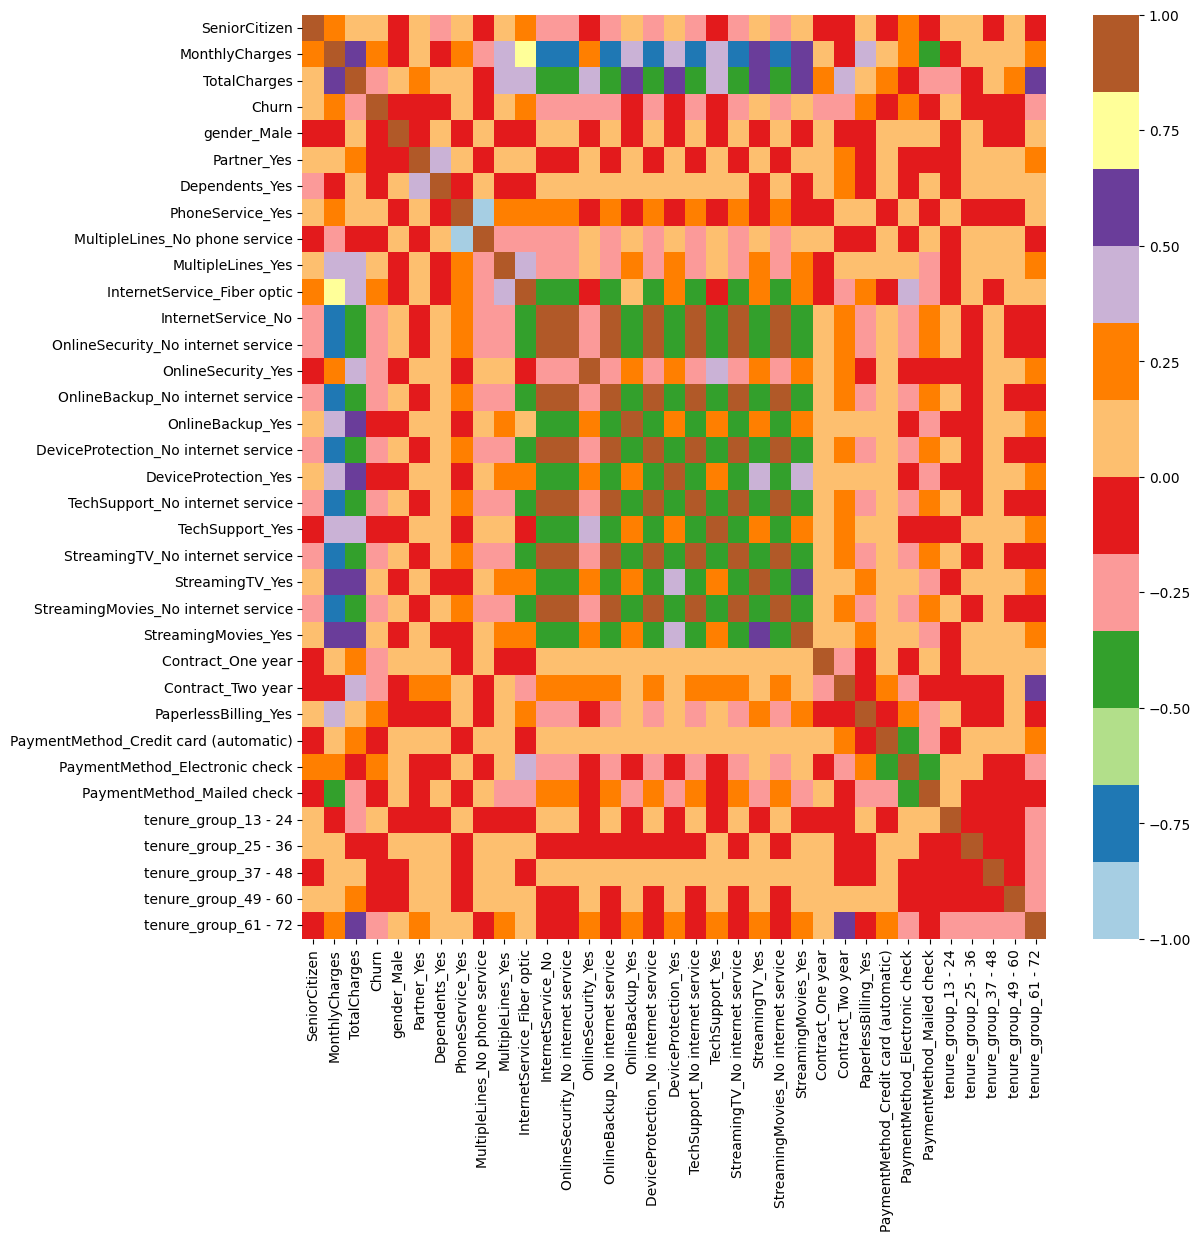

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_df_new_dummies.corr(), cmap="Paired")

## Bivariate Analysis

In [40]:
# Split the dataset into two separate dataframes:
# 1. new_df1_target0: Contains all rows where "Churn" is 0 (customers who did not churn).
new_df1_target0=telco_df_new.loc[telco_df_new["Churn"]==0]

# 2. new_df1_target1: Contains all rows where "Churn" is 1 (customers who churned).
new_df1_target1=telco_df_new.loc[telco_df_new["Churn"]==1]


In [41]:
# def uniplot(df, col, title, hue=None):
#     # Set the style and context for the plot
#     sns.set_style('whitegrid')
#     sns.set_context('talk')
    
#     # Configure plot aesthetics like label size and title size
#     plt.rcParams["axes.labelsize"] = 20
#     plt.rcParams['axes.titlesize'] = 22
#     plt.rcParams['axes.titlepad'] = 30
    
#     # Create a temporary series from the 'hue' parameter
#     temp = pd.Series(data=hue)
    
#     # Initialize the figure and axis for the plot
#     fig, ax = plt.subplots()
    
#     # Adjust the width of the plot based on the number of unique values in the 'col' and 'hue' columns
#     width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
#     fig.set_size_inches(width, 8)
    
#     # Rotate the x-axis labels for better readability
#     plt.xticks(rotation=45)
    
#     # Set the y-axis to a logarithmic scale
#     plt.yscale('log')
    
#     # Set the title of the plot
#     plt.title(title)
    
#     # Generate a count plot with the specified column and optional hue
#     ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright') 
        
#     # Display the plot
#     plt.show()


In [42]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data=hue)
    
    fig, ax = plt.subplots()
    
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    
    plt.xticks(rotation=45)
    
    plt.title(title)
    
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright') 
        
    plt.show()


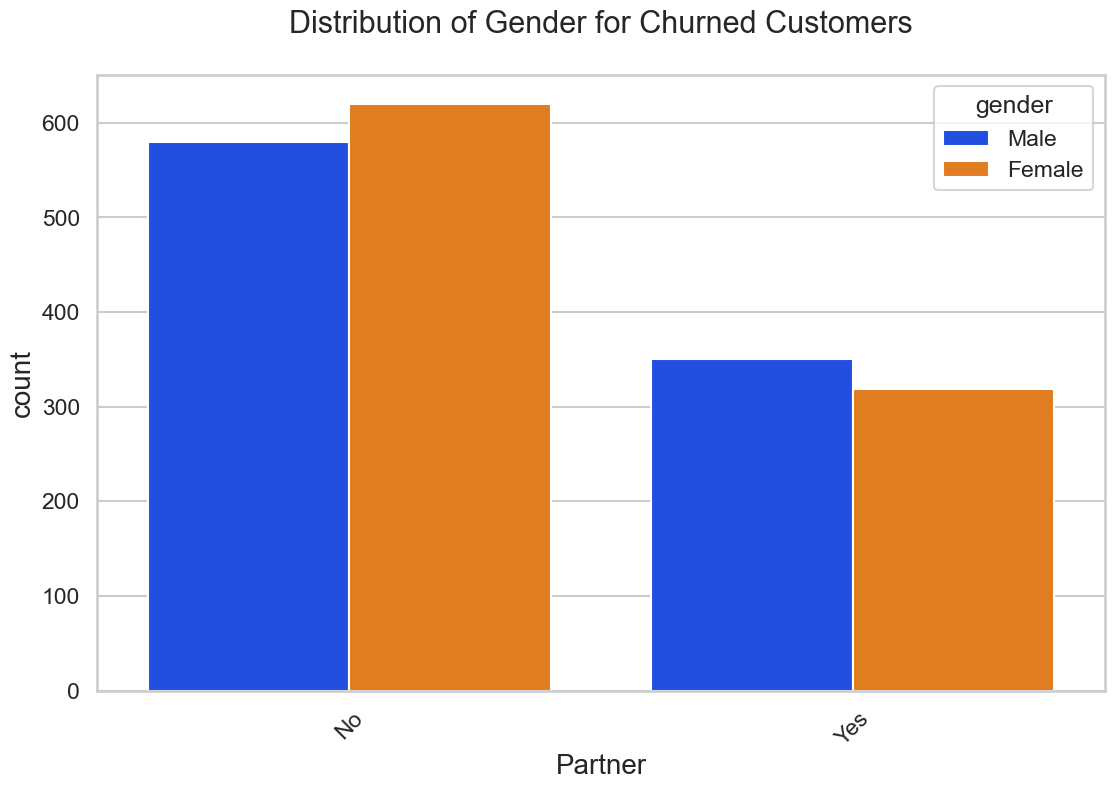

In [43]:
# This plot displays the distribution of the 'Partner' status among churned customers, categorized by 'gender'. 
# It helps to examine if churn rates for customers with and without a partner differ based on gender.

uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

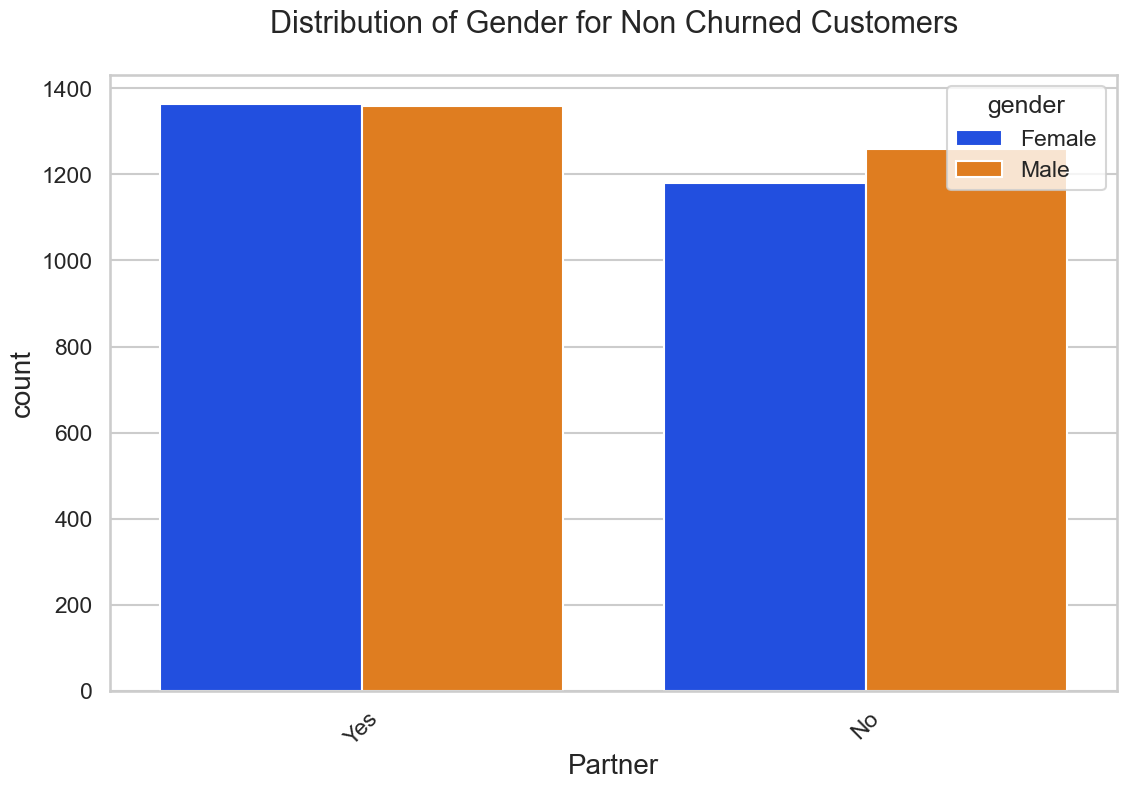

In [44]:
# This plot illustrates the distribution of the 'Partner' status among non-churned customers, segmented by 'gender'. 
# It helps to analyze if the presence or absence of a partner affects churn rates differently for different genders.

uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

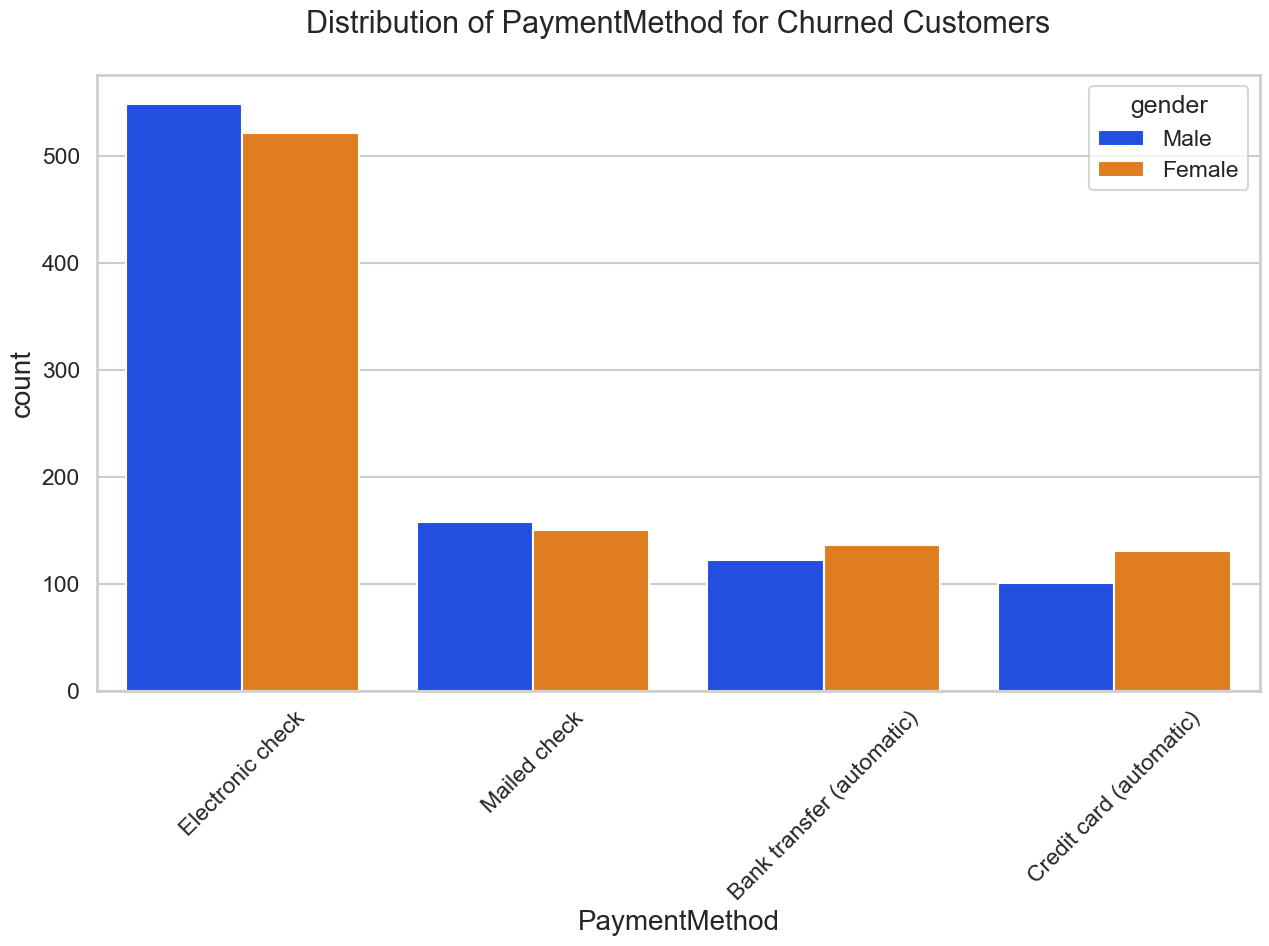

In [45]:
# This plot displays the distribution of 'PaymentMethod' among churned customers, with different colors representing 'gender'.
# It helps to assess if there is a notable difference in payment methods between genders among customers who have churned.

uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

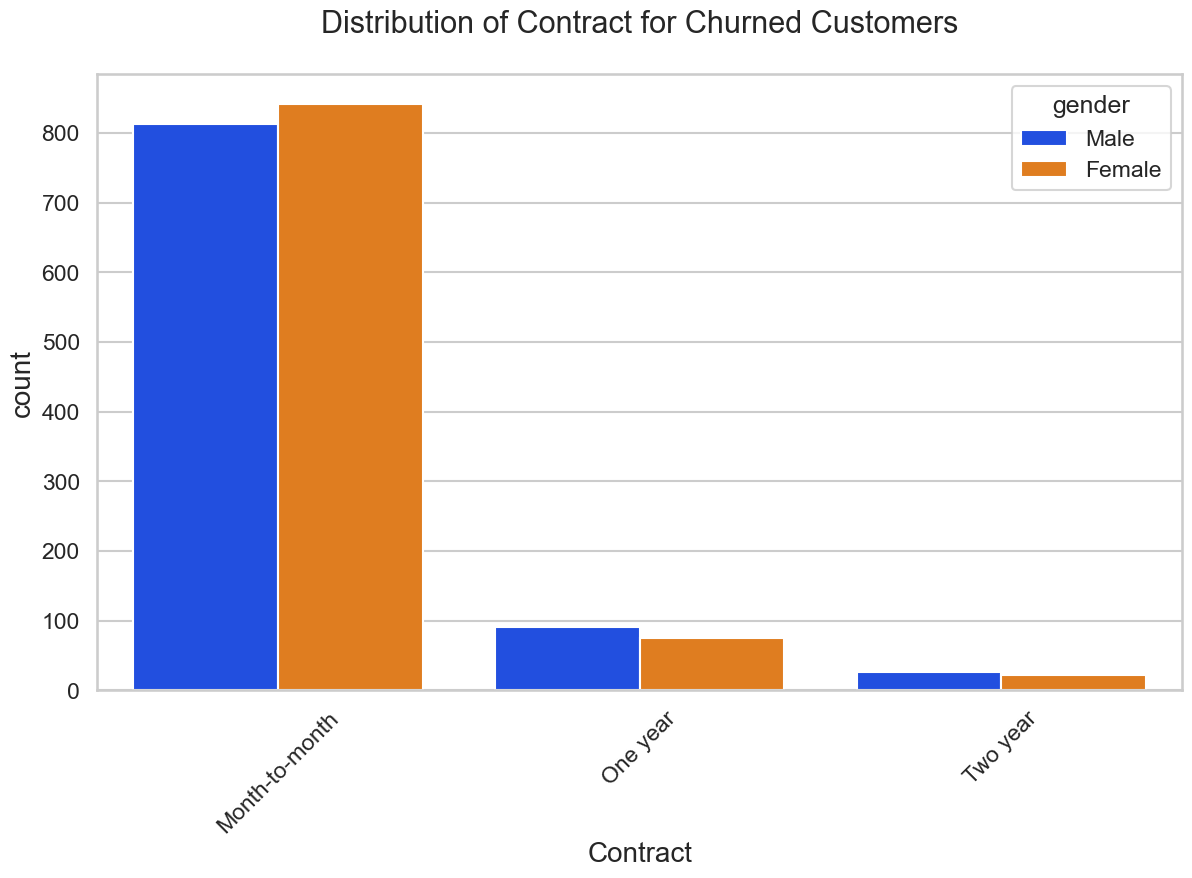

In [46]:
# This will generate a count plot showing the distribution of contract types for churned customers,
# separated by gender.
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

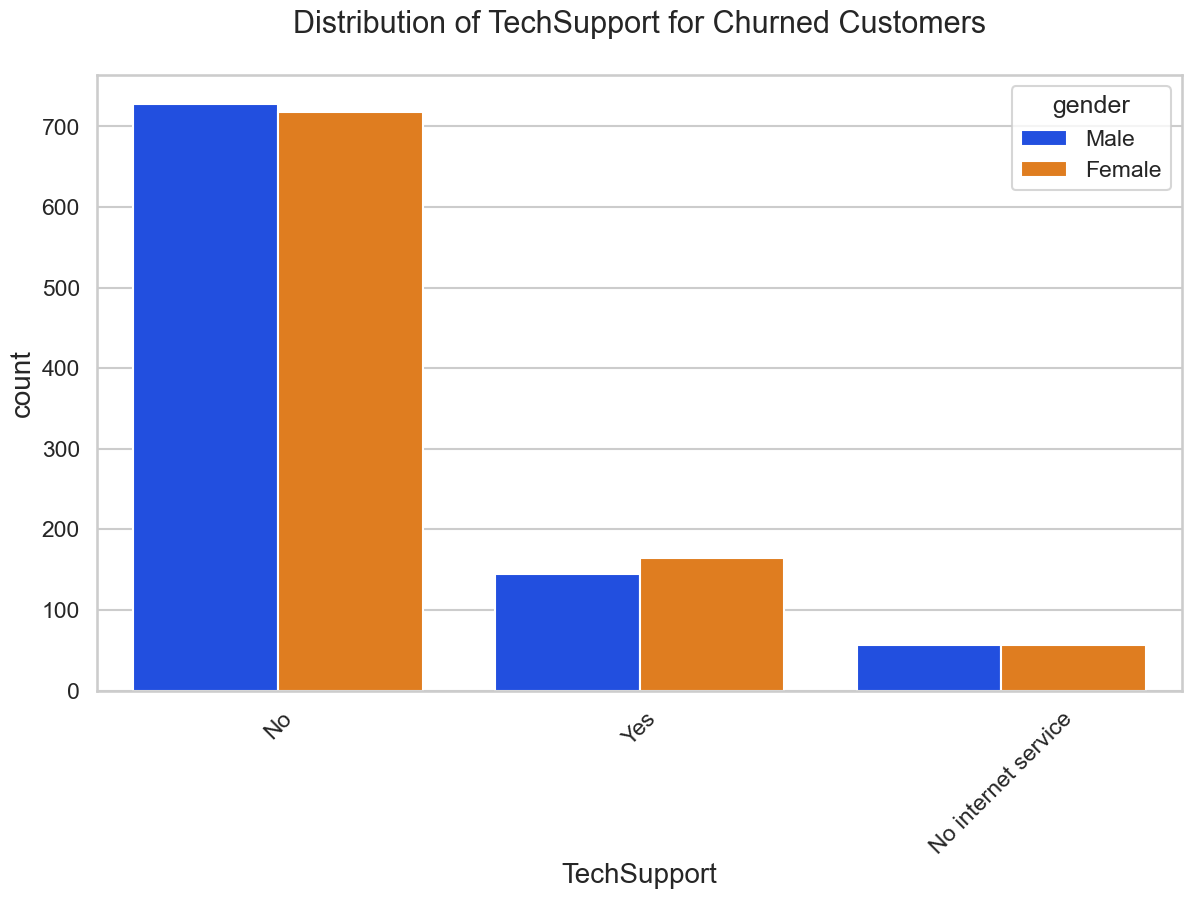

In [47]:
# This will generate a count plot showing the distribution of TechSupport categories for churned customers,
# separated by gender.
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

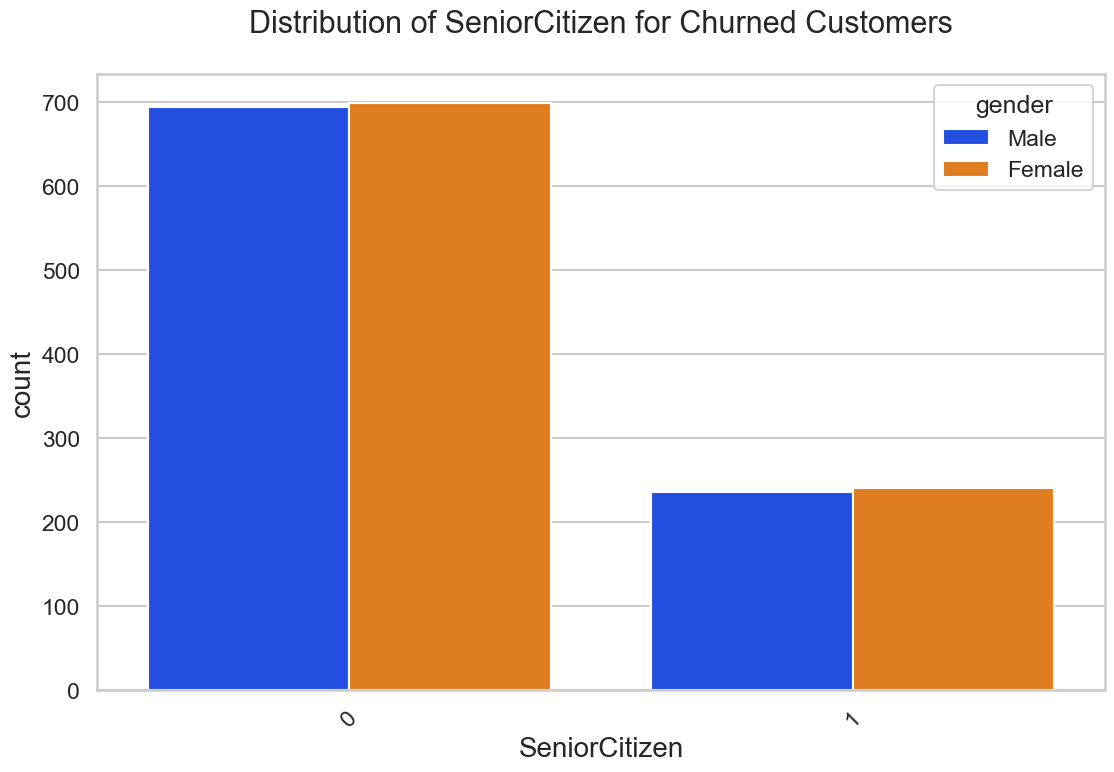

In [48]:
# Generate a count plot to visualize the distribution of SeniorCitizen status among churned customers,
# with bars separated by gender
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## Conclusion

### Key Insights Derived from the Analysis

1. **Electronic Check Payment Method**:  
   Customers who use the electronic check payment method have the highest churn rate. This could indicate dissatisfaction with this payment option or that it’s more common among customers who are already at risk of churning.

2. **Contract Type**:  
   Customers on month-to-month contracts are more likely to churn. Since these customers are not bound by long-term contracts, they have greater flexibility to leave, making them more susceptible to churn.

3. **Lack of Online Security and Tech Support**:  
   Customers who do not have online security or tech support services are also more likely to churn. This suggests that these additional services might play a role in customer retention, and their absence could be a factor in customers deciding to leave.

4. **Senior Citizens vs. Non-Senior Citizens**:  
   Non-senior citizens have a higher churn rate compared to senior citizens. This could reflect differences in needs, expectations, or satisfaction levels between these two demographic groups.


In [49]:
telco_df_new_dummies.to_csv('telco_churn.csv')